Sign Language ResNet 50

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [252]:
data_train=pd.read_csv('../raw_data/sign_mnist_train.csv')
data_test=pd.read_csv('../raw_data/sign_mnist_test.csv')

In [253]:
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [254]:
y_train=data_train["label"]

In [255]:
X_train=data_train.drop(columns=["label"])

In [256]:
X_train.shape, y_train.shape

((27455, 784), (27455,))

In [257]:
y_train.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [258]:
len(y_train.unique())

24

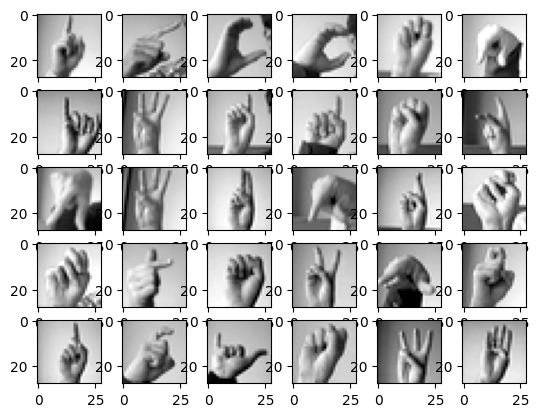

In [259]:
label=[y_train]
images=X_train
for i in range(30):
    plt.subplot(5,6,i+1)
    img=images[i:i+1]
    plt.imshow(img.values.reshape(28,28), cmap='gray')

In [260]:
y_test=data_test["label"]

In [261]:
X_test=data_test.drop(columns=["label"])

In [262]:
X_test.shape, y_test.shape

((7172, 784), (7172,))

In [263]:
labels = y_train.value_counts().sort_index(ascending=True)
labels 

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: count, dtype: int64

In [264]:
len(labels)

24

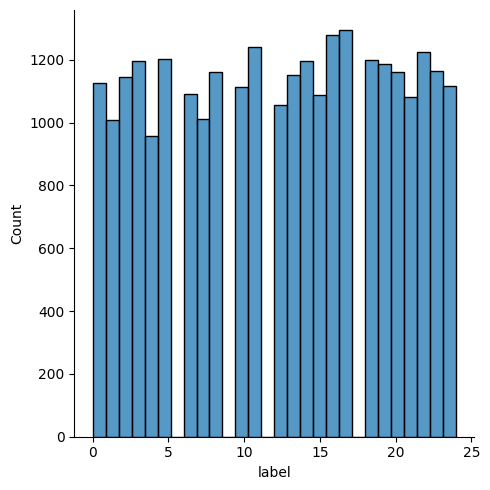

In [265]:
sns.displot(y_train)

In [266]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(27455, 28, 28, 1)

In [267]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(7172, 28, 28, 1)

In [270]:
y_train.shape,y_test.shape

((27455,), (7172,))

In [272]:
y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25 )

In [273]:
y_train_cat.shape

(27455, 25)

/tmp/ipykernel_4977/2823552083.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


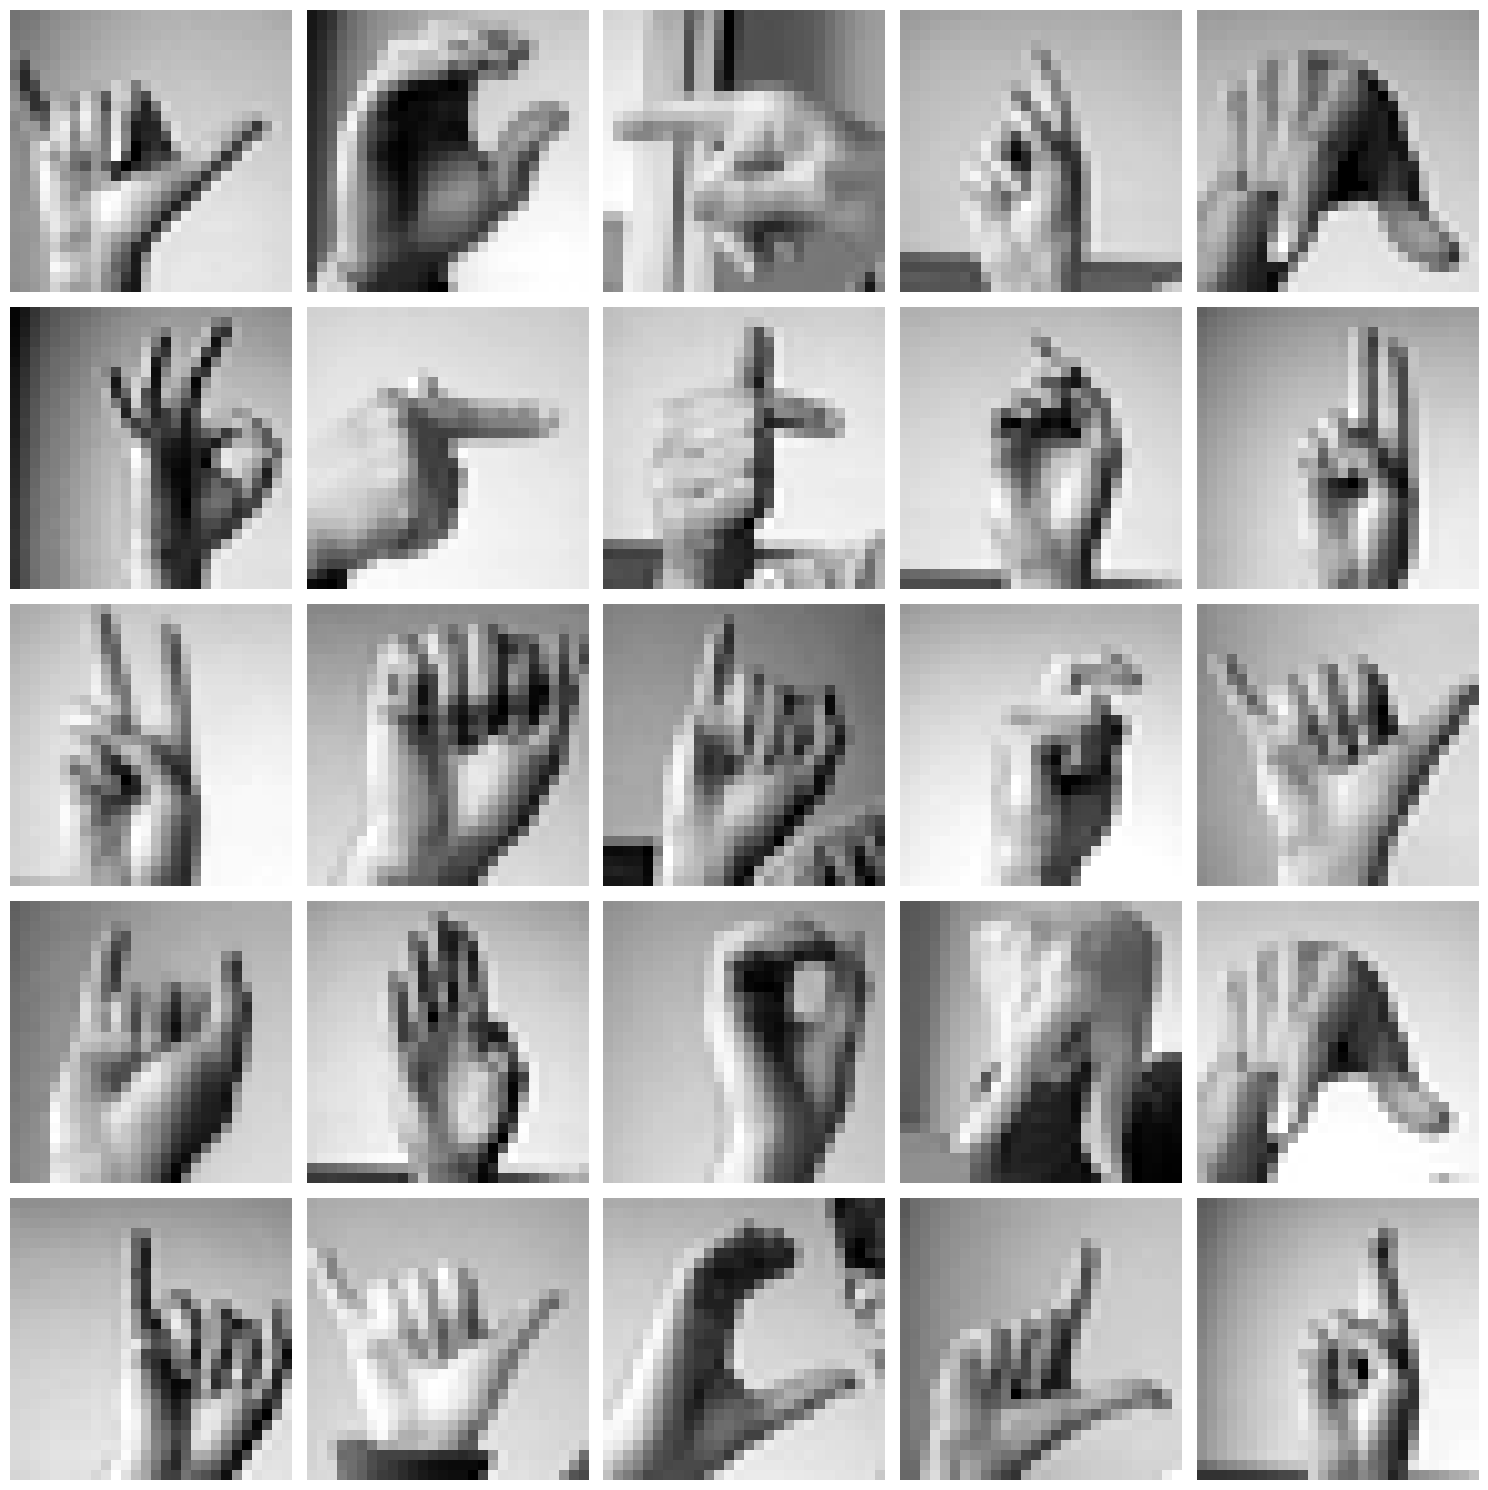

In [274]:
# get some random index fro the train
random_index = np.random.choice(range(len(X_train)),25)
# show the 12 random images 
plt.figure(figsize=(15,15))
plt.title("Some Random Training Images")
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[random_index[i]],cmap=plt.get_cmap("gray"))
    plt.axis("off")
plt.tight_layout()
plt.show() 

In [275]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras import Model



In [276]:
#Identity Block
def identity_block(X, f, filters):
      
    # Filters in the CONV layers of the main path
    f1, f2, f3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = layers.BatchNormalization(axis = 3)(X) 
    X = layers.Activation('relu')(X)

    #Second Component of main path
    X = Conv2D(filters = f2, kernel_size = 1, strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    #Third Component of main path
    X = Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = layers.Add()([X,X_shortcut])
    X = layers.Activation('relu')(X)

    return X

In [277]:
#Convolutional Block
def convolutional_block(X, f, filters,s = 2):
    
    # Retrieve Filters
    F1, F2, F3 = filters
    # Save the input value
    X_shortcut = X
    
    # First component of main path 
    X = Conv2D(F1, kernel_size = 1, strides = (s,s))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Second component of main path 
    X = Conv2D(F2, kernel_size = 1, strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu') (X)

    # Third component of main path 
    X = Conv2D(F3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    #Short cut Path
    X_shortcut = Conv2D(F3, kernel_size = 1, strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

In [278]:
#Res-Net50 model
def ResNet50(input_shape = (28, 28, 1), classes =len(labels)+1 ):
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    #Padding
    X = ZeroPadding2D((3, 3))(X_input)

    #Stage 1
    X = Conv2D(64, (5, 5), strides = (1, 1))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    #Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    #Stage 3
    X = convolutional_block(X, f = 1, filters = [128, 128, 512], s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    #Stage 4
    X = convolutional_block(X, f = 1, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    ## addd average pool layer
    X = layers.AveragePooling2D((2,2))(X)

    # output layer
    X = layers.Flatten()(X)
    X = layers.Dense(classes, activation='softmax')(X)


    #Create model
    model = Model(inputs = X_input, outputs = X)

    return model


In [279]:
model =ResNet50()
print(model.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 zero_padding2d_16 (ZeroPad  (None, 34, 34, 1)            0         ['input_19[0][0]']            
 ding2D)                                                                                          
                                                                                                  
 conv2d_415 (Conv2D)         (None, 30, 30, 64)           1664      ['zero_padding2d_16[0][0]']   
                                                                                                  
 batch_normalization_413 (B  (None, 30, 30, 64)           256       ['conv2d_415[0][0]']    

In [280]:
# now compiling the model
model.compile(optimizer="adam",metrics=["accuracy"],loss = "categorical_crossentropy")

In [289]:
# data augmentation
datagen = ImageDataGenerator(
        rotation_range=10,  #rotation
        zoom_range = 0.1,   #Zoom
        width_shift_range=0.1, #horizontal shift
        height_shift_range=0.1, #vertical shift
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2] # brightness
                            )

In [298]:
# splitting the test into dev/blind sets
from sklearn.model_selection import train_test_split
test_X,val_X ,test_y, val_y = train_test_split(X_test,y_test_cat,test_size=.2,stratify=y_test)

In [299]:
test_X.shape,val_X.shape

((5737, 28, 28, 1), (1435, 28, 28, 1))

In [300]:
test_y.shape,val_y.shape

((5737, 25), (1435, 25))

In [301]:
history = model.fit(
    datagen.flow(X_train,y_train_cat,batch_size=32),
    validation_data =datagen.flow(val_X,val_y),
    epochs =10
    )

Epoch 1/10
858/858 [==============================] - 148s 173ms/step - loss: 0.4675 - accuracy: 0.8415 - val_loss: 5.4157 - val_accuracy: 0.2678
Epoch 2/10
858/858 [==============================] - 149s 174ms/step - loss: 0.4302 - accuracy: 0.8566 - val_loss: 1.2861 - val_accuracy: 0.6578
Epoch 3/10
858/858 [==============================] - 150s 175ms/step - loss: 0.3957 - accuracy: 0.8665 - val_loss: 1.2768 - val_accuracy: 0.6467
Epoch 4/10
858/858 [==============================] - 150s 174ms/step - loss: 0.3569 - accuracy: 0.8793 - val_loss: 0.8352 - val_accuracy: 0.7567
Epoch 5/10
858/858 [==============================] - 150s 174ms/step - loss: 0.3393 - accuracy: 0.8844 - val_loss: 1.5550 - val_accuracy: 0.5715
Epoch 6/10
858/858 [==============================] - 152s 177ms/step - loss: 0.3282 - accuracy: 0.8904 - val_loss: 1.3552 - val_accuracy: 0.6421
Epoch 7/10
858/858 [==============================] - 149s 174ms/step - loss: 0.3022 - accuracy: 0.8998 - val_loss: 1.7973 -

In [302]:
X = range(len(history.history["loss"]))
train_loss = history.history["loss"]
val_loss =history.history["val_loss"]
train_acc = history.history["accuracy"]
val_accuracy =history.history["val_accuracy"]


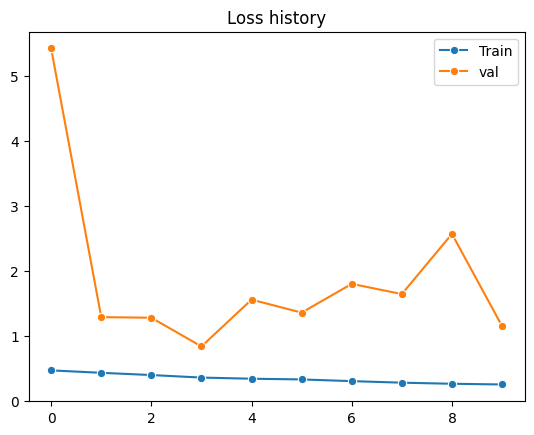

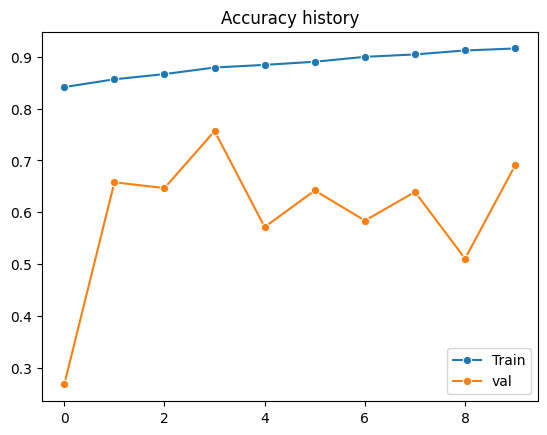

In [303]:
plt.figure()
plt.title("Loss history")
sns.lineplot(x=X,y=train_loss,label="Train",marker="o")
sns.lineplot(x=X,y=val_loss,label="val",marker="o")
plt.show()
plt.figure()
plt.title("Accuracy history")
sns.lineplot(x=X,y=train_acc,label="Train",marker="o")
sns.lineplot(x=X,y=val_accuracy,label="val",marker="o")
plt.show()

In [304]:
model.evaluate(test_X,test_y)

180/180 [==============================] - 6s 33ms/step - loss: 0.6880 - accuracy: 0.8077


[0.6880486607551575, 0.8077392578125]

In [306]:
letters ="ABCDEFGHIKLMNOPQRSTUVWXY"
dic={}
for i in range(len(letters)):
    if i>=9:
        dic[i+1]=letters[i]
    else:
        dic[i]=letters[i]
dic

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

In [307]:
def prdict(image):
    image =image.reshape(1,28,28,1)
    labels = list(dic.keys()) 
    probalility_prdicted = model.predict(image)
    predicted_digit = labels[np.argmax(probalility_prdicted)]
    return predicted_digit

In [309]:
prdict(test_X[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 412ms/step


1

1/1 [==============================] - 0s 24ms/step


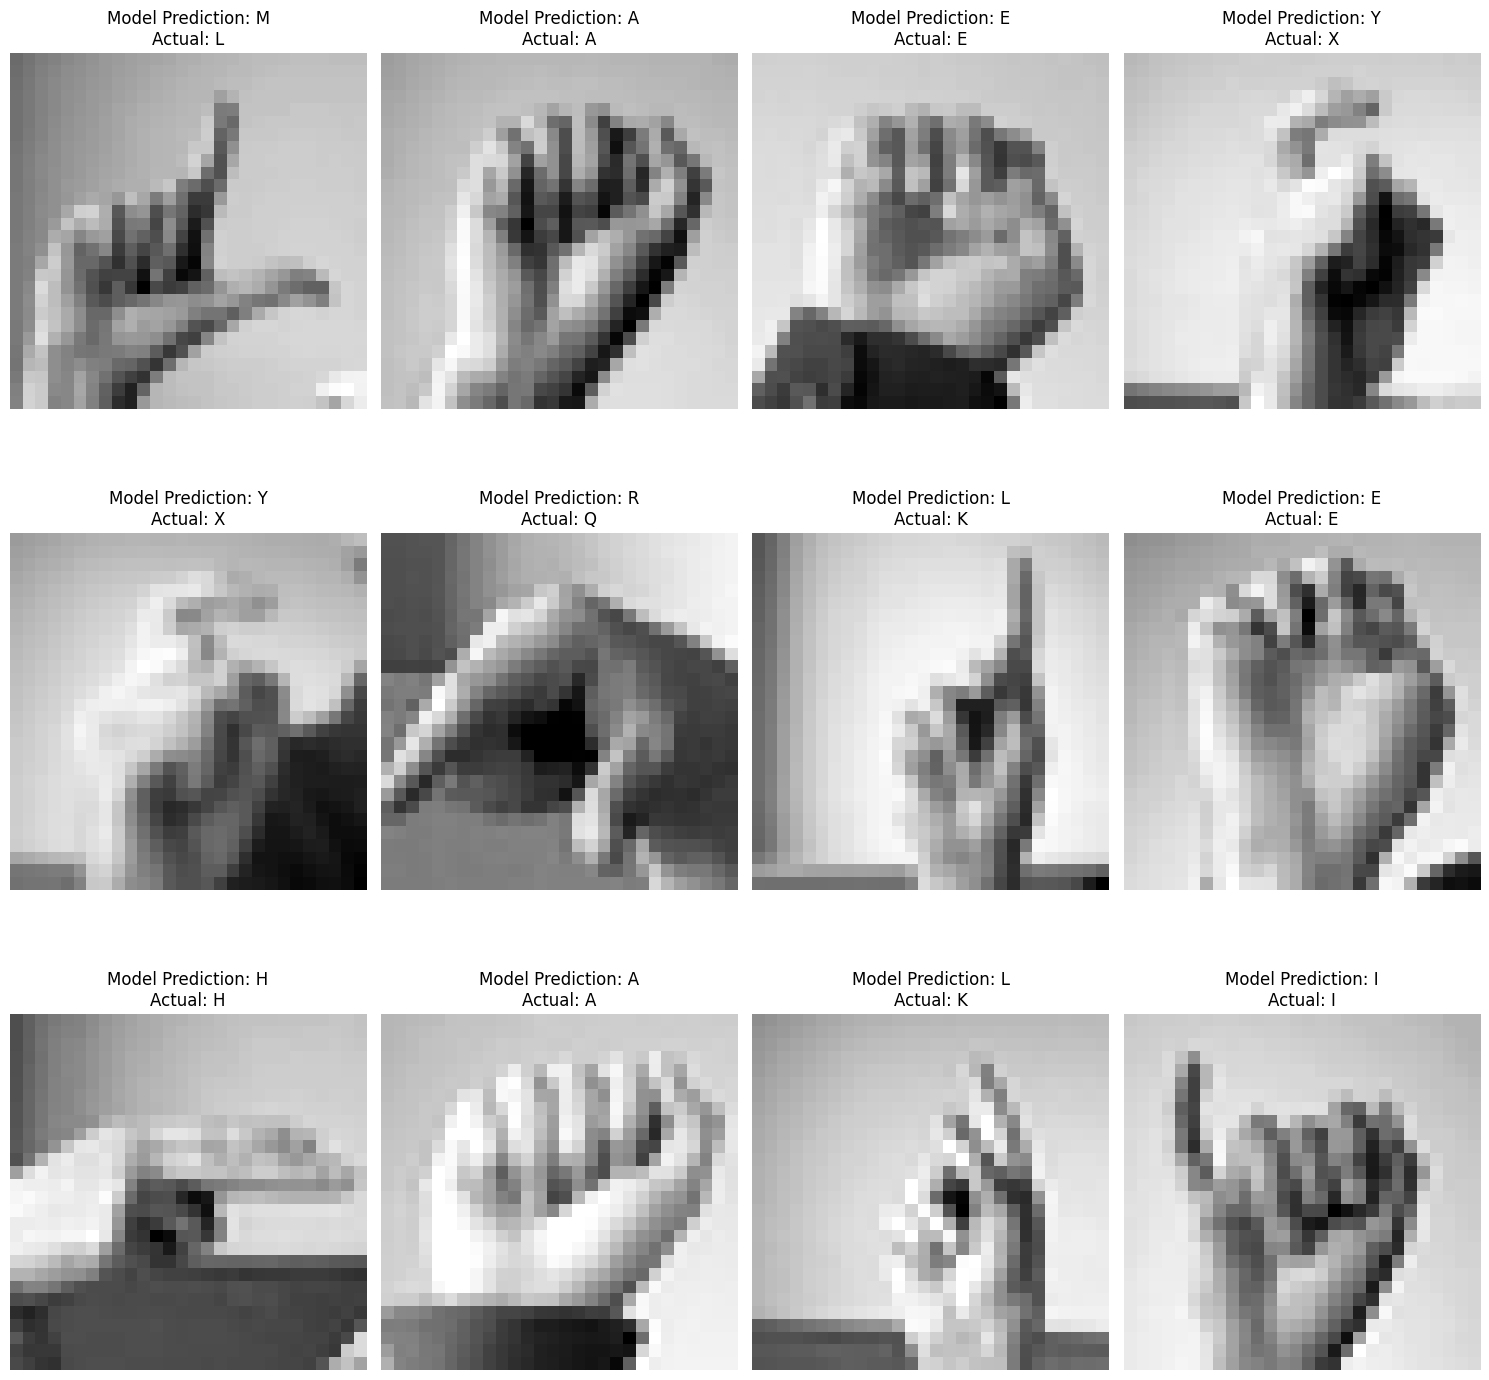

In [315]:
# get some random index fro the train
random_index = np.random.choice(range(len(X_test)),12)
# show the 12 random images 
plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)
    predicted_digit = prdict(X_test[random_index[i]])
    plt.imshow(X_test[random_index[i]],cmap=plt.get_cmap("gray"))
    # the actual class 
    actual_class= y_test.iloc[random_index[i]]
    # the actual letter 
    actual_letter = dic[actual_class]
    # the predicted letter 
    predicted_letter = dic[predicted_digit]
    
    plt.title(f"Model Prediction: {predicted_letter}\nActual: {actual_letter}")
    plt.axis("off")
plt.tight_layout()
plt.show() 